## **Statement of Analysis Task**

**Find interesting relationships between people, who have credit risk and who don't have.**

# **PHASE 1: ASK**
**1. Main Question**
* What kind of people tend to need a credit more than other?

# **PHASE 2: Prepare**
**1 .Determine the credibility of the data.**
* The original dataset is prepared by Prof.Hofmann
* Data source: UCI

**2. Columns meaning**
* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - * highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (text - same as like saving accounts)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("../input/german-credit/german_credit_data.csv")

In [3]:
df.shape

(1000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,499.50,35.55,1.90,"3,271.26",20.90
std,288.82,11.38,0.65,"2,822.74",12.06
min,0.00,19.00,0.00,250.00,4.00
25%,249.75,27.00,2.00,"1,365.50",12.00
50%,499.50,33.00,2.00,"2,319.50",18.00
75%,749.25,42.00,2.00,"3,972.25",24.00
max,999.00,75.00,3.00,"18,424.00",72.00


In [6]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# **PHASE 3: Process**

**1. Clean the data, and prepare the data for analysis**
* Checking null values

In [7]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

There are null values in 2 columns but those null values will not affect the main point of analysis.

# **PHASE 4: Analyze**
**1. Idendify the relationships to ask the questions**
* Job vs Credit Amount, Checking Account, Housing (Does having a nice job affect the amount of credit and checking account ?)
* Age vs Credit Amount, Purpose, Duration (Does age affect those features?)


In [8]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


#### **1. Job vs Credit Amount, Checking Account, Housing**

In [9]:
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [10]:
df['Credit amount'].describe()

count    1,000.00
mean     3,271.26
std      2,822.74
min        250.00
25%      1,365.50
50%      2,319.50
75%      3,972.25
max     18,424.00
Name: Credit amount, dtype: float64

In [11]:
df.groupby('Job')['Credit amount'].mean()

Job
0   2,745.14
1   2,358.52
2   3,070.97
3   5,435.49
Name: Credit amount, dtype: float64

In [12]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female   2,877.77
male     3,448.04
Name: Credit amount, dtype: float64

In [13]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

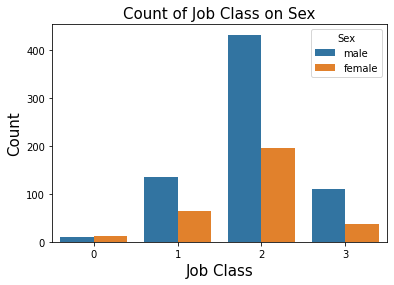

In [14]:
sns.countplot(data=df, x='Job', hue='Sex')

plt.title("Count of Job Class on Sex", size=15)
plt.xlabel("Job Class", size=15)
plt.ylabel("Count", size=15)

plt.show()

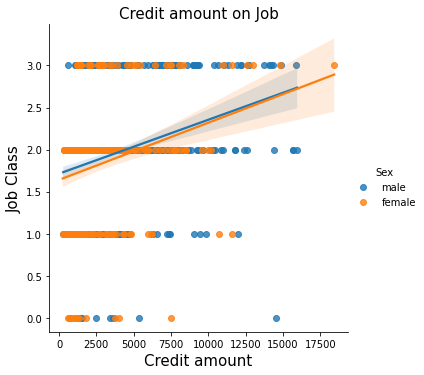

In [15]:
sns.lmplot(data=df, x='Credit amount', y='Job', hue='Sex')

plt.title("Credit amount on Job", size=15)
plt.xlabel("Credit amount", size=15)
plt.ylabel("Job Class", size=15)

plt.show()

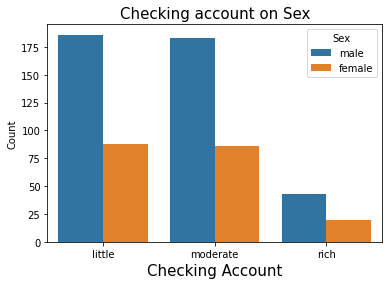

In [16]:
sns.countplot(data=df, x='Checking account', hue='Sex')

plt.title("Checking account on Sex", size=15)
plt.xlabel("Checking Account", size=15)
plt.ylabel("Count")

plt.show()

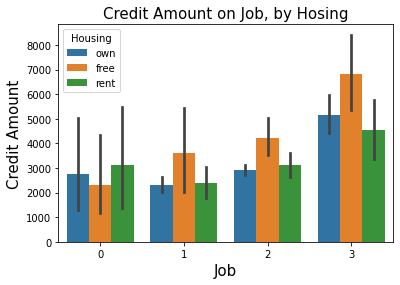

In [17]:
sns.barplot(data=df, x='Job', y='Credit amount', hue='Housing')

plt.title('Credit Amount on Job, by Hosing', size=15)
plt.xlabel("Job", size=15)
plt.ylabel("Credit Amount", size=15)

plt.show()

**Main Point**
* People from this dataset have mostly job class 2.
* People tend to have more credit, who have high class job.
* People, who don't pay moeny for house, have more credit amount.

#### **2. Age vs Credit Amount, Purpose, Duration**

In [18]:
df['Age'].describe()

count   1,000.00
mean       35.55
std        11.38
min        19.00
25%        27.00
50%        33.00
75%        42.00
max        75.00
Name: Age, dtype: float64

In [19]:
df.groupby('Sex')['Age'].mean()

Sex
female   32.80
male     36.78
Name: Age, dtype: float64

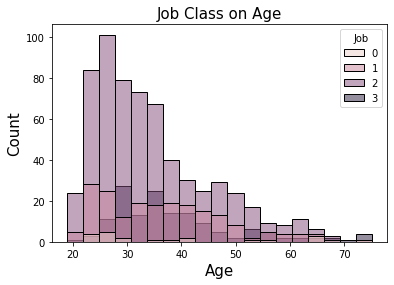

In [20]:
sns.histplot(data=df, x='Age', hue='Job')

plt.title("Job Class on Age", size=15)
plt.xlabel("Age", size=15)
plt.ylabel("Count", size=15)

plt.show()

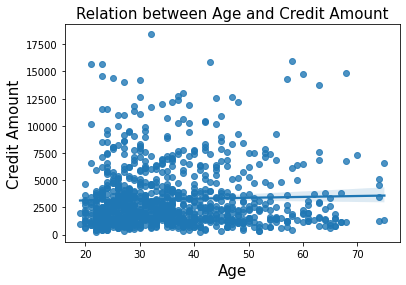

In [21]:
sns.regplot(data=df, x='Age', y='Credit amount')

plt.title("Relation between Age and Credit Amount", size=15)
plt.xlabel("Age", size=15)
plt.ylabel("Credit Amount", size=15)

plt.show()

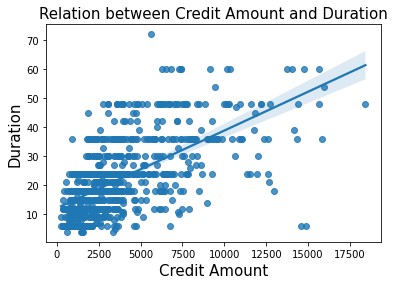

In [22]:
sns.regplot(data=df, x='Credit amount', y='Duration')

plt.title("Relation between Credit Amount and Duration", size=15)
plt.xlabel("Credit Amount", size=15)
plt.ylabel("Duration", size=15)

plt.show()

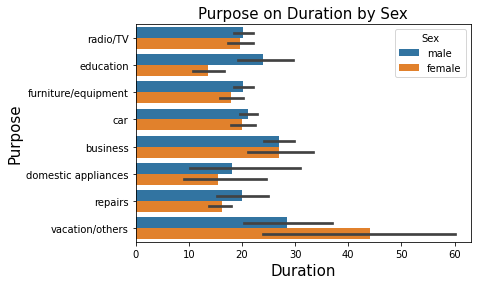

In [23]:
sns.barplot(data=df, x='Duration', y='Purpose', hue='Sex')

plt.title("Purpose on Duration by Sex", size=15)
plt.xlabel("Duration", size=15)
plt.ylabel("Purpose", size=15)

plt.show()

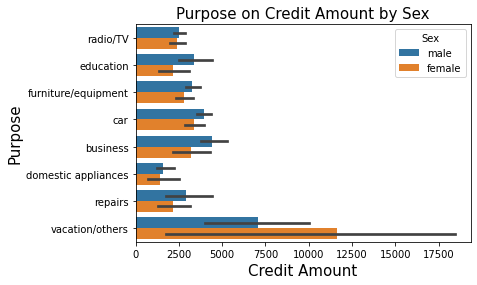

In [24]:
sns.barplot(data=df, x='Credit amount', y='Purpose', hue='Sex')

plt.title("Purpose on Credit Amount by Sex", size=15)
plt.xlabel("Credit Amount", size=15)
plt.ylabel("Purpose", size=15)

plt.show()

The remarkable point is,
* It seems like that age does not affect to credit amount.
* It may sound obvious, but the more credit amount, the longer duration.
* Female tend to have more credit amount, durtaion for their vacation.

# **PHASE 5: Share**
#### **1. Share my conclusion**
* What kind of people tend to need a credit more than other?
    * A female
    * lives in a house for free
    * has a job class 2 ~ 3
    * has a purpose for vacation

